<center><b style="font-size:300%; background-color: #44B78B;">Potts problem solver</b></center>

The file `lib/Potts.py` includes a solver for the Potts problem. 


For a vector $x\in\mathbb{R}^n$, the *$\ell_2$-Potts problem* writes
$$ \arg\min_{p\in\mathbb{R}^n} \| \Delta p \|_0 + \gamma \|p-x\|_2^2 $$
where $\| \Delta p \|_0$ is the semi-norm 0 of the increments, i.e. the number of jumps:  $\| \Delta p \|_0 = Card(i\in\{1,..,n-1\} : p_i \neq p_{i+1} )$.


Similarly, the *$\ell_1$-Potts problem* writes
$$ \arg\min_{p\in\mathbb{R}^n} \| \Delta p \|_0 + \gamma \|p-x\|_1. $$



# Implementation


The solution is obtained by dynamical programming based on 
* Friedrich, Felix, et al. "Complexity penalized M-estimation: fast computation." Journal of Computational and Graphical Statistics 17.1 (2008): 201-224. 

# Example: Piecewise-constant signal denoising

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

### Generating a piecewise constant noisy signal 

In [2]:
n = 50
nb_jumps = 4

In [3]:
j = np.sort(np.random.choice(range(1,n-1),size=nb_jumps-1, replace=False))
v = np.random.rand(nb_jumps)*10

In [4]:
x = np.zeros(n)

jump = 0
for i in range(n):
    x[i] = v[jump]

    if jump < nb_jumps-1 and i == j[jump]:
            jump += 1

In [5]:
sigma = 0.03*max(v)

y = x + sigma*np.random.randn(n)

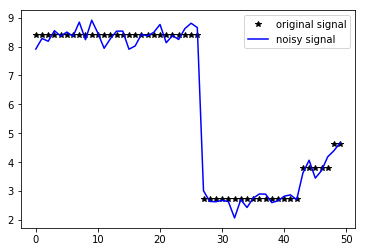

In [6]:
plt.plot(x , 'k*',label="original signal")
plt.plot(y , 'b',label="noisy signal")
plt.legend()

### L2 Potts

In [7]:
import lib.Potts as lp 

In [8]:
p = lp.L2_Potts(y,0.7)

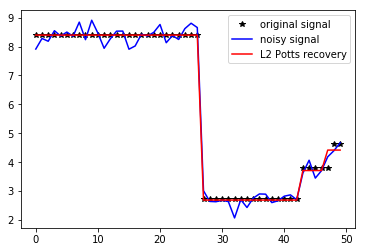

In [9]:
plt.plot(x , 'k*',label="original signal")
plt.plot(y , 'b',label="noisy signal")
plt.plot(p , 'r',label="L2 Potts recovery")
plt.legend()

### L1 Potts

In [10]:
import lib.Potts as lp 

In [11]:
p1 = lp.L1_Potts(y,0.9)

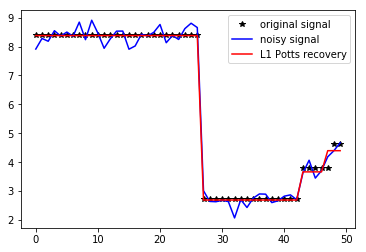

In [12]:
plt.plot(x , 'k*',label="original signal")
plt.plot(y , 'b',label="noisy signal")
plt.plot(p1 , 'r',label="L1 Potts recovery")
plt.legend()